# DATA PREPROCESSING

In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Библиотеки для работы с данными и визуализации
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns

# Предупреждения
import warnings

# Операционная система
import os

# Статистические методы
import scipy
from scipy import stats

# Масштабирование признаков
from sklearn.preprocessing import MinMaxScaler

# Визуализация
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Модели машинного обучения
import catboost as ct
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier
)

# Метрики оценки модели
from sklearn.metrics import (
    roc_auc_score,
    precision_score, 
    accuracy_score, 
    recall_score,
)


# Поиск гиперпараметров
from sklearn.model_selection import RandomizedSearchCV

# Кросс-валидация
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedStratifiedKFold

# Построение и использование пайплайнов
from sklearn.pipeline import Pipeline

# Для оверсэмплинга
from imblearn.over_sampling import ADASYN, SMOTE

# Пайплайны с учетом дисбаланса классов
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbPipeline

# Игнорирование предупреждений
warnings.filterwarnings("ignore")

In [97]:
# Загрузка данных из CSV файла в DataFrame
df = pd.read_csv('/data.csv')

Выбираем только указанные колонки из загруженного датасета, используя список **selected_columns**, и сохраняем результат в переменной **df_accepted**.

In [98]:
# Выбор только указанных колонок из датасета
selected_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 
                    'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
                    'loan_status', 'purpose', 'open_acc','pub_rec', 'revol_bal', 
                    'revol_util','total_acc', 'application_type']

# Выбор только указанных колонок из датасета
df = df.loc[:, selected_columns]


In [99]:
# Используем метод rename для переименования колонок
df.rename(columns=lambda x: x.upper(), inplace=True)


In [100]:
df.head()

,LOAN_AMNT,TERM,INT_RATE,INSTALLMENT,GRADE,SUB_GRADE,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INC,VERIFICATION_STATUS,LOAN_STATUS,PURPOSE,OPEN_ACC,PUB_REC,REVOL_BAL,REVOL_UTIL,TOTAL_ACC,APPLICATION_TYPE
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,7.0,0.0,2765.0,29.7,13.0,Individual
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,22.0,0.0,21470.0,19.2,38.0,Individual
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,6.0,0.0,7869.0,56.2,18.0,Joint App
3,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Current,debt_consolidation,13.0,0.0,7802.0,11.6,17.0,Individual
4,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,12.0,0.0,21929.0,64.5,35.0,Individual


| Название колонки       | Описание                                                                                  |
|------------------------|-------------------------------------------------------------------------------------------|
| LOAN_AMNT              | Сумма выданного кредита.                                                                  |
| TERM                   | Срок кредита.                                                                             |
| INT_RATE               | Процентная ставка по кредиту.                                                             |
| INSTALLMENT            | Ежемесячный платеж.                                                                       |
| GRADE                  | Категория кредита.                                                                        |
| SUB_GRADE              | Подкатегория кредита.                                                                     |
| EMP_TITLE              | Название работодателя.                                                                    |
| EMP_LENGTH             | Стаж работы на текущем месте.                                                             |
| HOME_OWNERSHIP         | Владение домом.                                                                           |
| ANNUAL_INC             | Годовой доход.                                                                            |
| VERIFICATION_STATUS    | Статус проверки дохода.                                                                   |
| ISSUE_D                | Дата выдачи кредита.                                                                      |
| LOAN_STATUS            | Статус кредита.                                                                           |
| PURPOSE                | Цель кредита.                                                                             |
| TITLE                  | Название кредита.                                                                         |
| EARLIEST_CR_LINE       | Дата открытия самой старой кредитной линии.                                              |
| OPEN_ACC               | Количество открытых кредитов.                                                             |
| PUB_REC                | Количество открытых записей о банкротствах.                                               |
| REVOL_BAL              | Баланс по оборотному кредиту.                                                             |
| REVOL_UTIL             | Коэффициент использования оборотных средств.                                               |
| TOTAL_ACC              | Общее количество кредитных линий.                                                         |
| APPLICATION_TYPE       | Тип заявки на кредит.                                                                     |

In [101]:
df = df[df['LOAN_STATUS'].isin(['Fully Paid', 'Charged Off'])]

In [102]:
df.LOAN_STATUS.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   LOAN_AMNT            1345310 non-null  float64
 1   TERM                 1345310 non-null  object 
 2   INT_RATE             1345310 non-null  float64
 3   INSTALLMENT          1345310 non-null  float64
 4   GRADE                1345310 non-null  object 
 5   SUB_GRADE            1345310 non-null  object 
 6   EMP_LENGTH           1266799 non-null  object 
 7   HOME_OWNERSHIP       1345310 non-null  object 
 8   ANNUAL_INC           1345310 non-null  float64
 9   VERIFICATION_STATUS  1345310 non-null  object 
 10  LOAN_STATUS          1345310 non-null  object 
 11  PURPOSE              1345310 non-null  object 
 12  OPEN_ACC             1345310 non-null  float64
 13  PUB_REC              1345310 non-null  float64
 14  REVOL_BAL            1345310 non-null  float64
 15  REV

In [104]:
print("Пропущенные значения до обработки:")
print(df.isnull().sum())

Пропущенные значения до обработки:
LOAN_AMNT                  0
TERM                       0
INT_RATE                   0
INSTALLMENT                0
GRADE                      0
SUB_GRADE                  0
EMP_LENGTH             78511
HOME_OWNERSHIP             0
ANNUAL_INC                 0
VERIFICATION_STATUS        0
LOAN_STATUS                0
PURPOSE                    0
OPEN_ACC                   0
PUB_REC                    0
REVOL_BAL                  0
REVOL_UTIL               857
TOTAL_ACC                  0
APPLICATION_TYPE           0
dtype: int64


In [105]:
def handle_missing_values(df):
    # Пороговое значение для удаления пустых строк
    threshold = 0.02 * len(df)
    
    # Получаем столбцы с пропущенными значениями
    cols_with_missing = df.columns[df.isnull().any()]
    
    for col in cols_with_missing:
        # Если доля пропущенных значений <= 2% от общего числа строк
        if df[col].isnull().sum() <= threshold:
            # Удаляем строки с пропущенными значениями
            df.dropna(subset=[col], inplace=True)
        else:
            # Если данные числовые, заполняем пропущенные значения медианой
            if df[col].dtype in ['int64', 'float64']:
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
            else:
                # Если данные текстовые, заполняем пропущенные значения модой
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
    
    return df

In [106]:
# Применяем функцию к датафрейму
df_processed = handle_missing_values(df)

# Выводим информацию о пропущенных значениях после обработки
print("Пропущенные значения после обработки:")
print(df_processed.isnull().sum())

Пропущенные значения после обработки:
LOAN_AMNT              0
TERM                   0
INT_RATE               0
INSTALLMENT            0
GRADE                  0
SUB_GRADE              0
EMP_LENGTH             0
HOME_OWNERSHIP         0
ANNUAL_INC             0
VERIFICATION_STATUS    0
LOAN_STATUS            0
PURPOSE                0
OPEN_ACC               0
PUB_REC                0
REVOL_BAL              0
REVOL_UTIL             0
TOTAL_ACC              0
APPLICATION_TYPE       0
dtype: int64


In [107]:
# Проверяем наличие дубликатов
duplicates = df_processed.duplicated()

# Выводим количество найденных дубликатов
print("Количество дубликатов в датафрейме:", duplicates.sum())


Количество дубликатов в датафрейме: 0


In [108]:
# create categorical variable list
cat_vars = [var for var in df_processed.columns 
            if df_processed[var].dtype == 'O']

# create numerical variable list
num_vars = [var for var in df_processed.columns
           if df_processed[var].dtype != 'O']

print('Количество категориальных признаков: {}'.format(len(cat_vars)))
print('Количество числовых признаков: {}'.format(len(num_vars)))

Количество категориальных признаков: 9
Количество числовых признаков: 9


In [109]:
# the percentage of the value distribution of target. 
df_processed['LOAN_STATUS'].value_counts() / len(df_processed)

LOAN_STATUS
Fully Paid     0.800381
Charged Off    0.199619
Name: count, dtype: float64

In [110]:
# Вывод количества уникальных значений для каждого категориального столбца
categorical_features = ['TERM', 'GRADE', 'SUB_GRADE','EMP_LENGTH', 'HOME_OWNERSHIP', 
                        'VERIFICATION_STATUS', 'LOAN_STATUS', 'PURPOSE', 
                        'APPLICATION_TYPE']

for column in categorical_features:
    unique_values_count = df_processed[column].nunique()
    print(f'{column}: {unique_values_count} уникальных значений')


TERM: 2 уникальных значений
GRADE: 7 уникальных значений
SUB_GRADE: 35 уникальных значений
EMP_LENGTH: 11 уникальных значений
HOME_OWNERSHIP: 6 уникальных значений
VERIFICATION_STATUS: 3 уникальных значений
LOAN_STATUS: 2 уникальных значений
PURPOSE: 14 уникальных значений
APPLICATION_TYPE: 2 уникальных значений


Этот вывод представляет собой распределение значений в столбце LOAN_STATUS. Он показывает, что 80.15% записей имеют значение "Fully Paid", а 19.85% записей имеют значение "Charged Off". Это полезная информация для анализа баланса классов в задаче классификации, такой как задача кредитного скоринга.

**"Fully Paid"** (полностью выплачен) 
**"Charged Off"** (просрочен)

**"Fully Paid"** указывает на то, что заемщик успешно выплатил весь кредит, в то время как **"Charged Off"** означает, что кредит просрочен и не выплачен. Эти классы являются целевой переменной в задаче прогнозирования кредитного риска, где цель состоит в том, чтобы предсказать вероятность просрочки кредита на основе различных признаков заемщика.



In [62]:
def show_distplot(feature, data, title, figsize):
    """Диаграмма распределения признака со средней, медианой и модой"""
    
    target_mean = round(data[feature].mean(), 2)
    target_median = data[feature].median()
    target_mode = data[feature].mode()[0]

    plt.figure(figsize = figsize)

    sns.distplot(data[feature], bins=70)

    plt.axvline(x=[target_mean], label='target_mean', linestyle=':',linewidth=4, color='red')
    plt.axvline(x=[target_median], label='target_median', linestyle='--', linewidth=4, color='green')
    plt.axvline(x=[target_mode], label='target_mode', linestyle='-.', linewidth=4, color='orange')
    plt.title(title)
    plt.legend()

In [63]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    """Отчет с метриками модели"""
    
    print('Train\n\n' + classification_report(y_train_true, y_train_pred))
    print('Test\n\n' + classification_report(y_test_true, y_test_pred))
    print('Confusion Matrix\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [90]:
def evaluate_preds(model, y_train, y_test, train_pool, test_pool):
    """Валидация модели, вывод отчетов"""
    
    y_train_pred = model.predict(train_pool)
    y_test_pred = model.predict(test_pool)
    
    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

array([[<Axes: title={'center': 'LOAN_AMNT'}>,
        <Axes: title={'center': 'INT_RATE'}>,
        <Axes: title={'center': 'INSTALLMENT'}>],
       [<Axes: title={'center': 'ANNUAL_INC'}>,
        <Axes: title={'center': 'OPEN_ACC'}>,
        <Axes: title={'center': 'PUB_REC'}>],
       [<Axes: title={'center': 'REVOL_BAL'}>,
        <Axes: title={'center': 'REVOL_UTIL'}>,
        <Axes: title={'center': 'TOTAL_ACC'}>]], dtype=object)

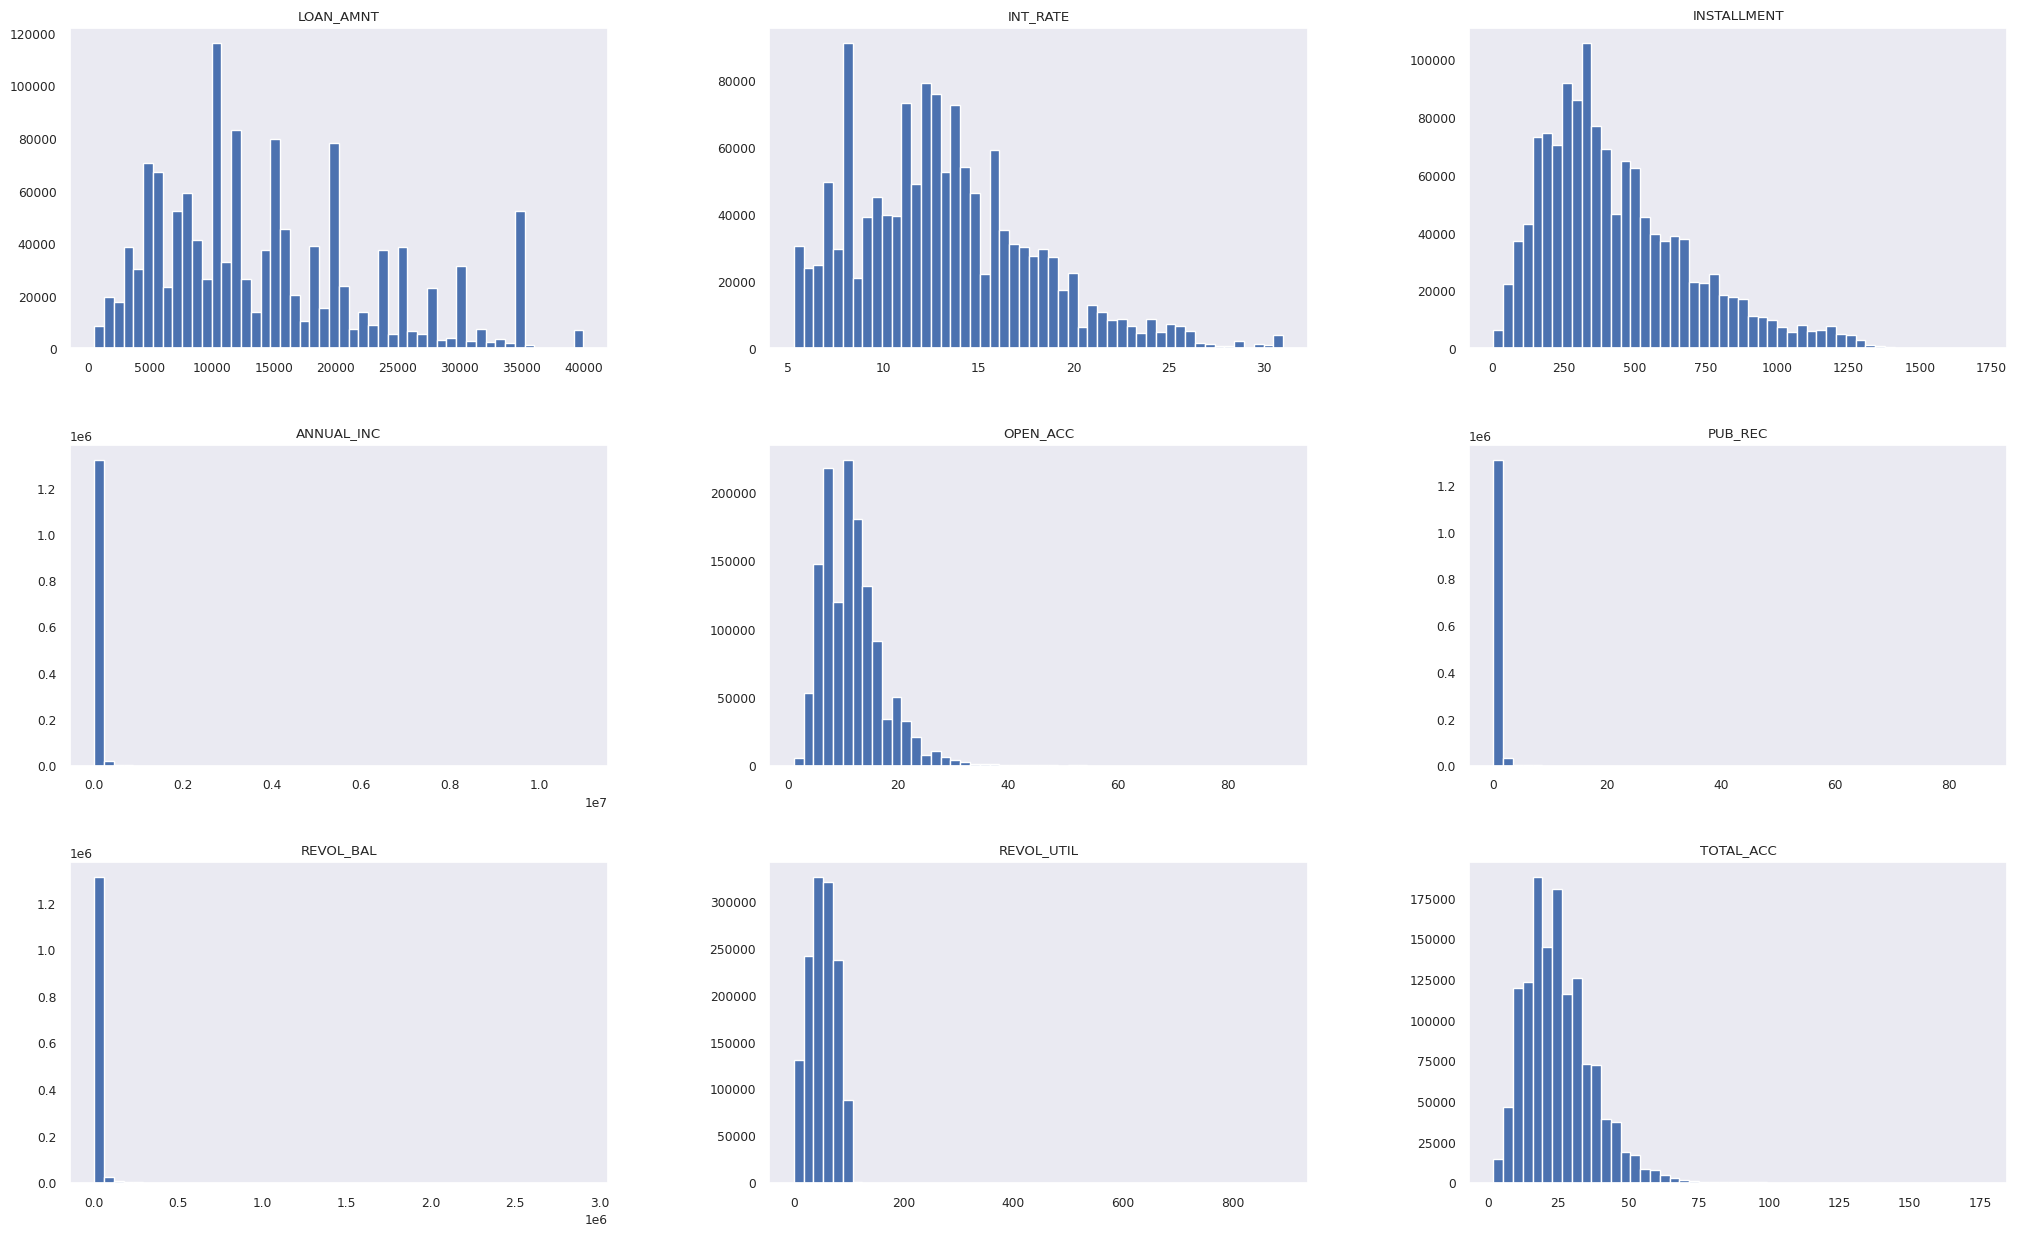

In [91]:
df_processed.select_dtypes(exclude=['object']).hist(figsize=(25,15), bins=50, grid=False)

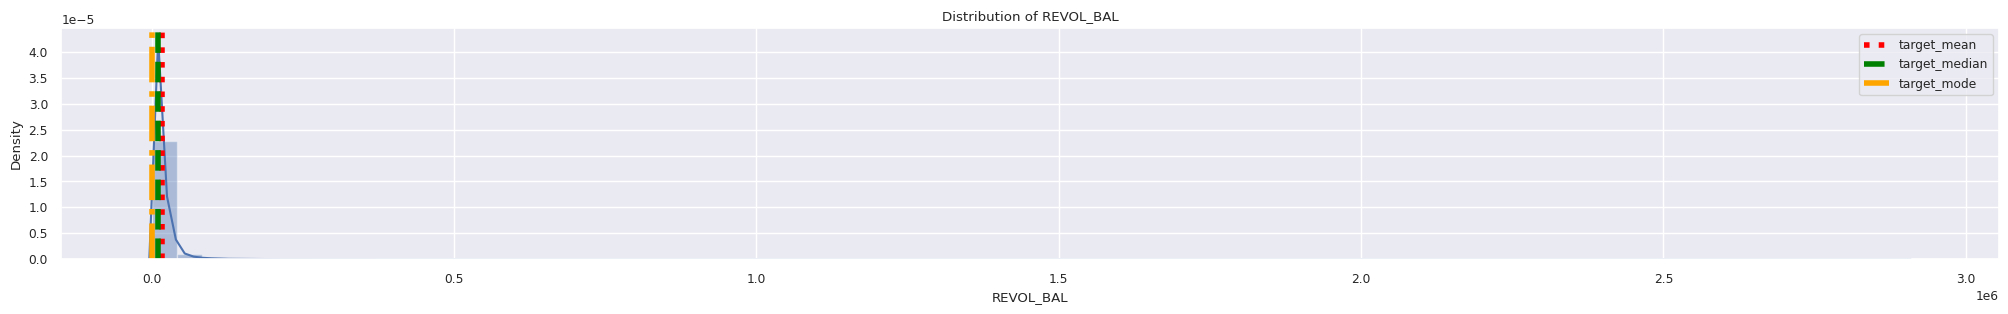

In [66]:
show_distplot(feature='REVOL_BAL', 
              data=df_processed, title='Distribution of REVOL_BAL', figsize=(25,3)) 

In [111]:
target_name = 'LOAN_STATUS'
feature_names = df_processed.columns.drop(target_name).tolist()
feature_names_num = df_processed.select_dtypes(include='float64').columns.tolist()
feature_names_cat = df_processed.select_dtypes(include=['object']).columns.drop(target_name).tolist()

In [112]:
feature_names_cat

['TERM',
 'GRADE',
 'SUB_GRADE',
 'EMP_LENGTH',
 'HOME_OWNERSHIP',
 'VERIFICATION_STATUS',
 'PURPOSE',
 'APPLICATION_TYPE']

In [71]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344453 entries, 0 to 2260697
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   LOAN_AMNT            1344453 non-null  float64
 1   TERM                 1344453 non-null  object 
 2   INT_RATE             1344453 non-null  float64
 3   INSTALLMENT          1344453 non-null  float64
 4   GRADE                1344453 non-null  object 
 5   SUB_GRADE            1344453 non-null  object 
 6   EMP_LENGTH           1344453 non-null  object 
 7   HOME_OWNERSHIP       1344453 non-null  object 
 8   ANNUAL_INC           1344453 non-null  float64
 9   VERIFICATION_STATUS  1344453 non-null  object 
 10  ISSUE_D              1344453 non-null  object 
 11  LOAN_STATUS          1344453 non-null  object 
 12  PURPOSE              1344453 non-null  object 
 13  EARLIEST_CR_LINE     1344453 non-null  object 
 14  OPEN_ACC             1344453 non-null  float64
 15  PUB

In [68]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from scipy.stats import shapiro, probplot, mannwhitneyu

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [113]:
X = df_processed[feature_names]
y = df_processed[target_name]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=True,
    test_size=0.3,
    random_state=42,
    stratify=y
)

LOAN_AMNT: 0.165
INT_RATE: 0.44
INSTALLMENT: 0.128
ANNUAL_INC: 0.76
OPEN_ACC: 0.938
PUB_REC: 0.531
REVOL_BAL: 0.539
REVOL_UTIL: 0.771
TOTAL_ACC: 0.227


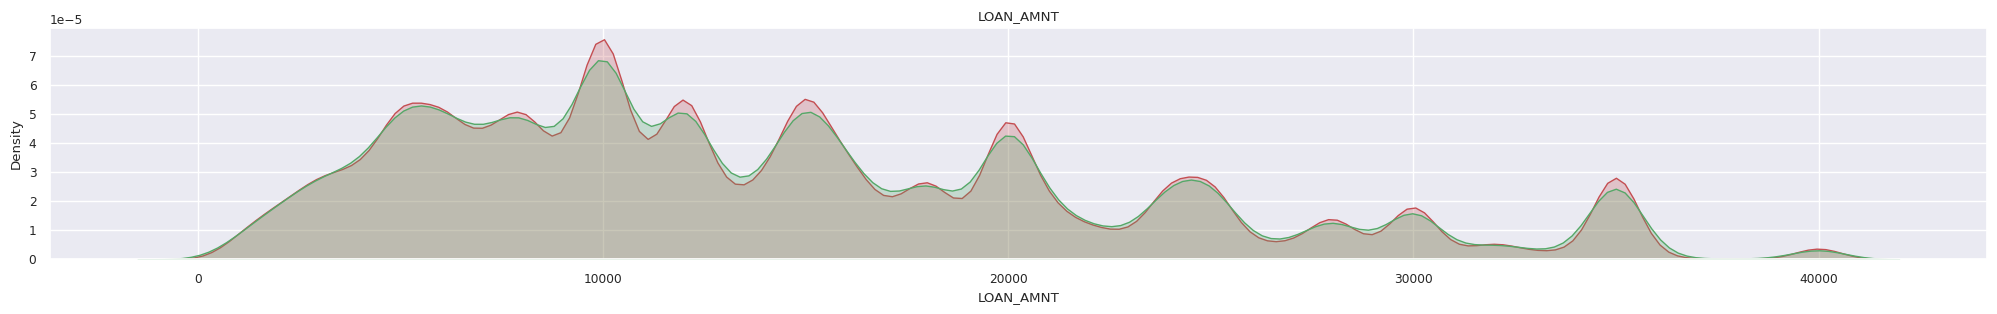

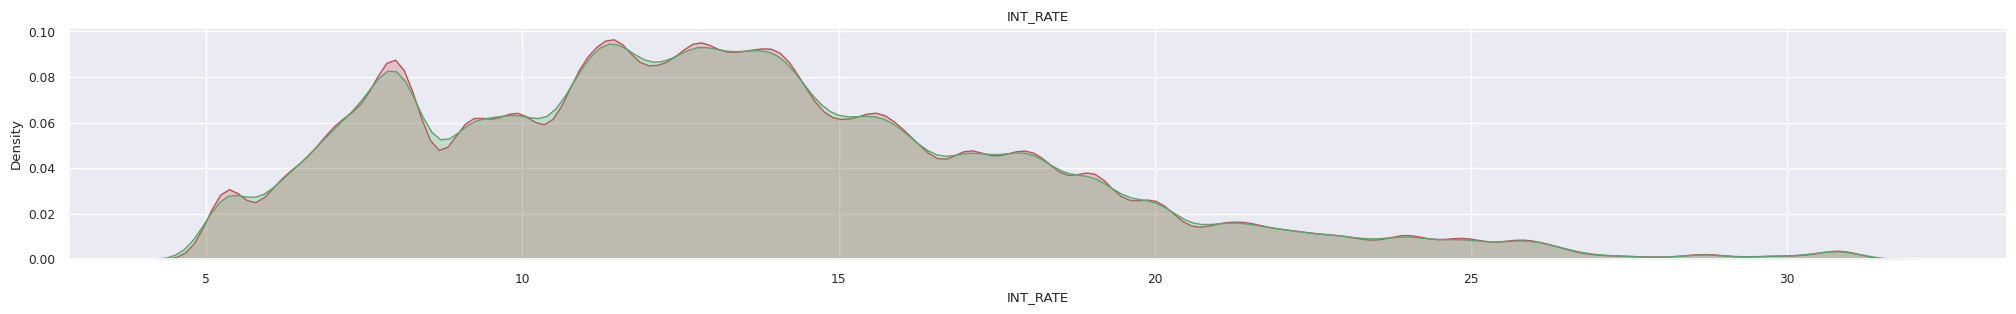

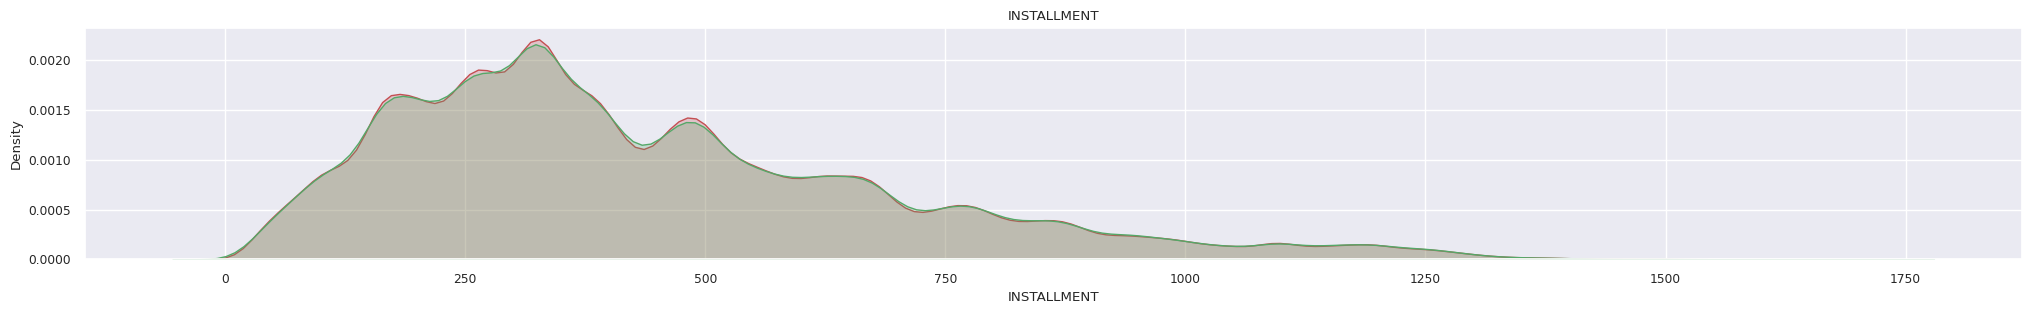

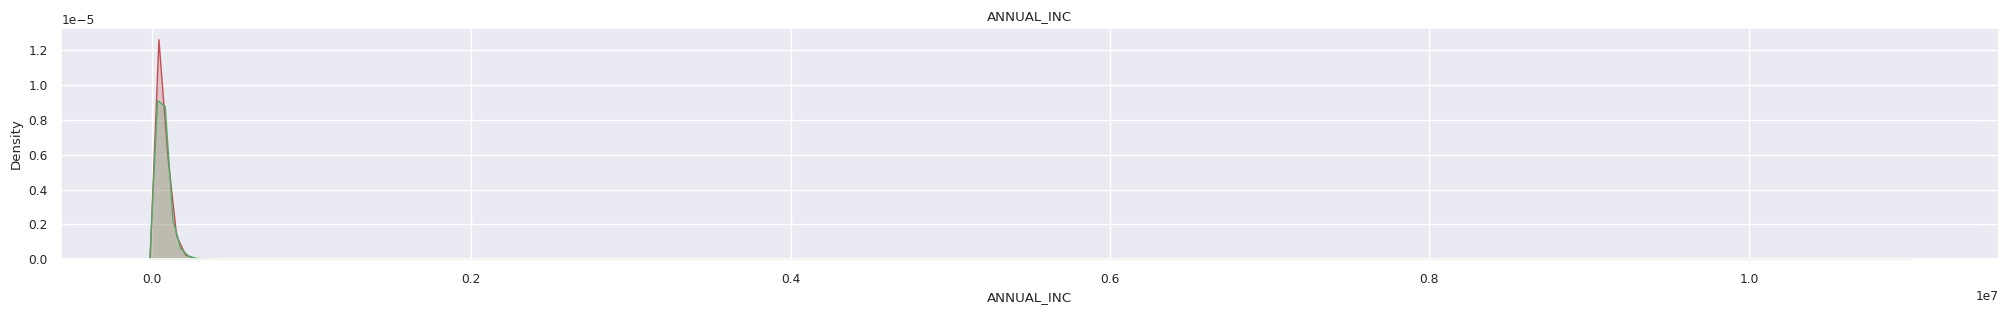

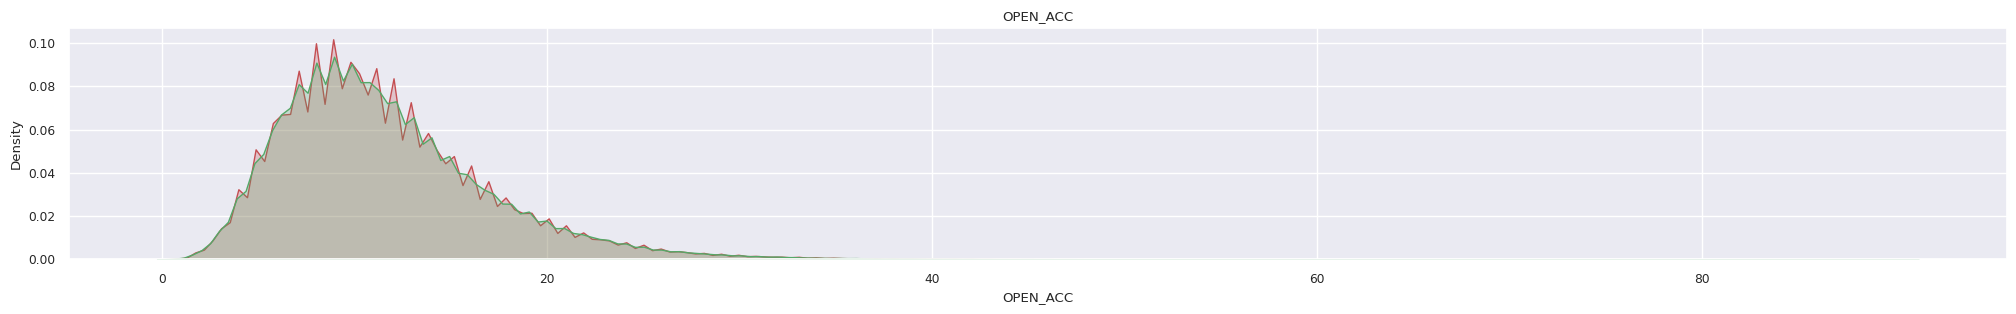

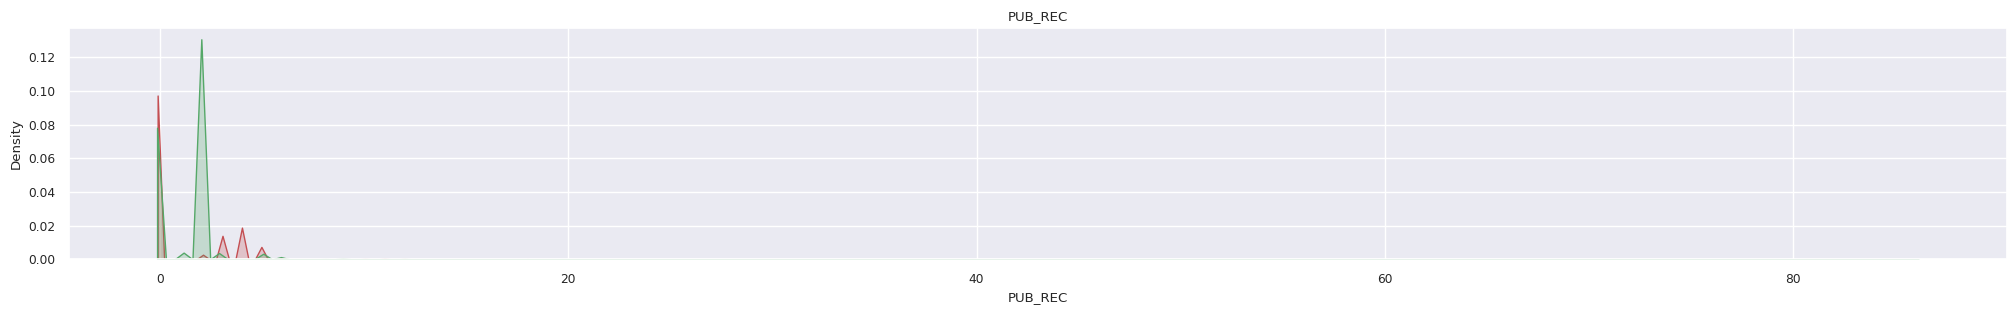

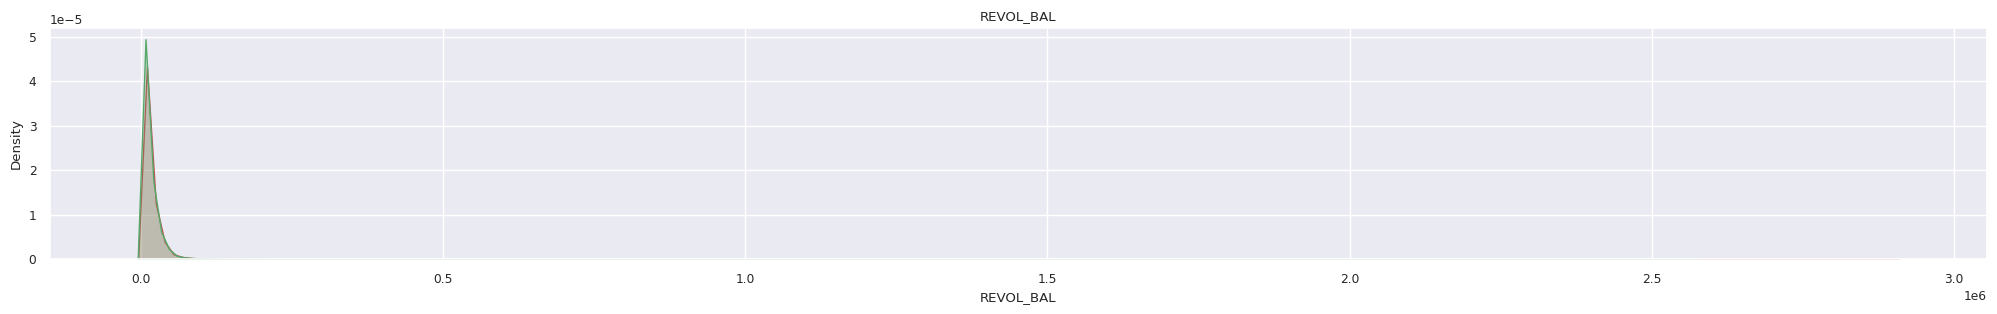

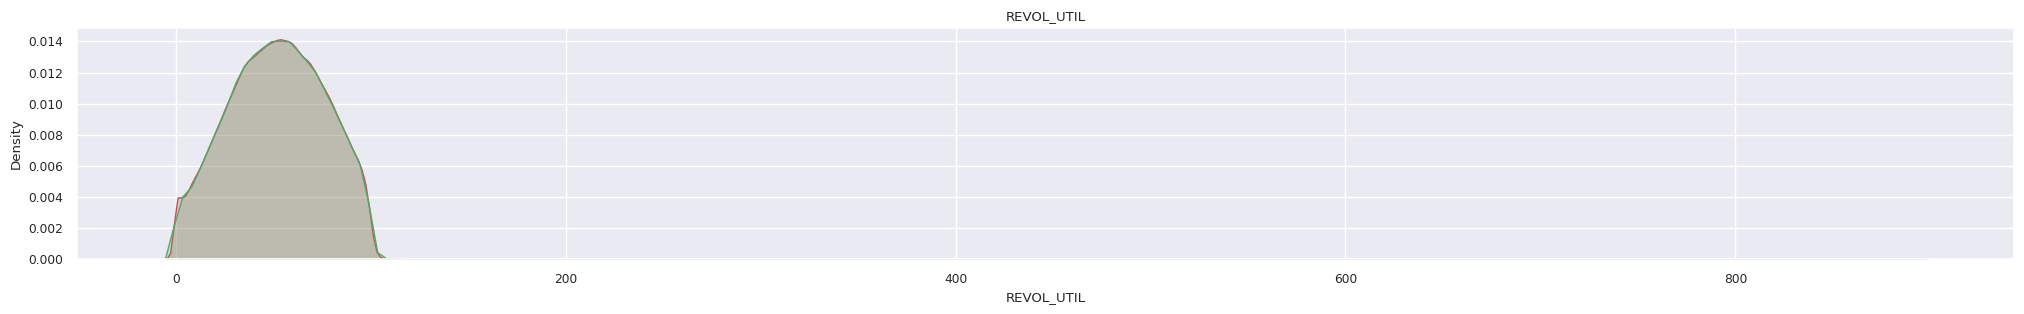

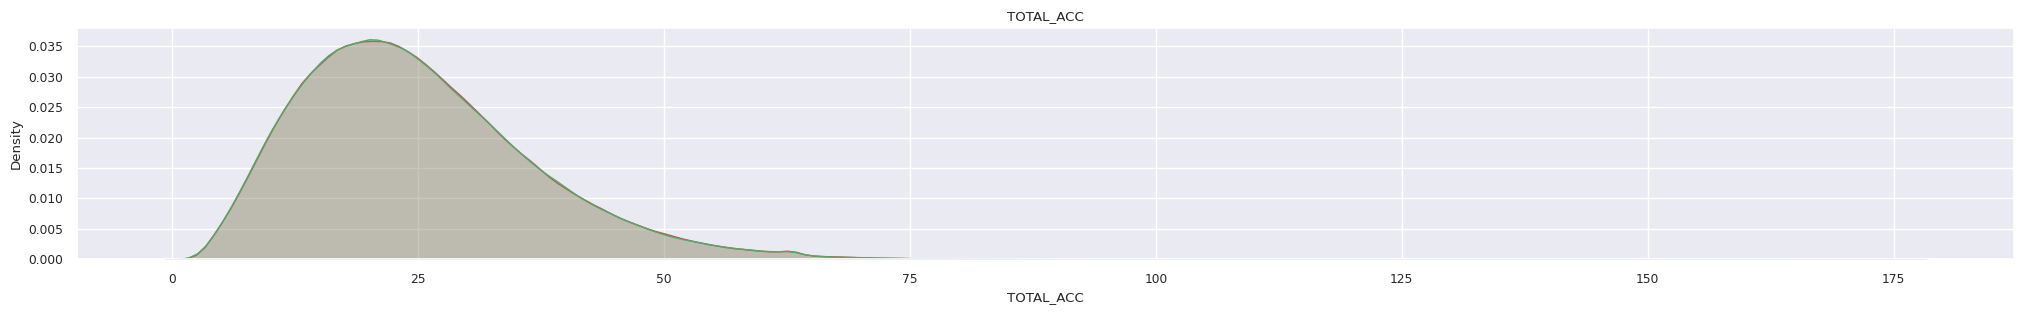

In [39]:
for col in feature_names_num:
    print(col + ': ' + str(round(mannwhitneyu(X_train[col], X_test[col])[1], 3)))
    plt.figure(figsize=(25, 3))
    sns.set(font_scale=0.8)
    sns.kdeplot(X_train[col], shade=True, label='train', color='r')
    sns.kdeplot(X_test[col], shade=True, label='test', color='g')
    plt.title(col)н

In [114]:
sorted([X_train[feature_names_cat][col].nunique() for col in feature_names_cat])[-1]

35

In [115]:
train_pool = Pool(
    X_train,
    y_train,
    cat_features=feature_names_cat
)

test_pool = Pool(
    X_test,
    y_test,
    cat_features=feature_names_cat
) 

params_model = {
    'eval_metric': 'F1',
    'auto_class_weights': 'Balanced',
    'silent': True,
    'one_hot_max_size': 40,
    'early_stopping_rounds': 50,
    'boosting_type': 'Ordered',
    'allow_writing_files': False
}

In [116]:
%%time

cbr_model = CatBoostClassifier(**params_model)

params_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.03, 0.1, 0.3, 0.5],
    'iterations': [100, 200, 400],
    'l2_leaf_reg': [2, 2.5, 3, 3.5, 4],
    'bagging_temperature': [1, 1.5, 2]
}

gs = cbr_model.randomized_search(
    params_grid,
    train_pool,
    n_iter=20,
    shuffle=True,
    stratified=True,
    partition_random_seed=42,
    cv=5
)

# pd.DataFrame(gs['cv_results']).sort_values('test-F1-mean', ascending=False).head()
gs


bestTest = 0.645127636
bestIteration = 197

0:	loss: 0.6451276	best: 0.6451276 (0)	total: 1m 11s	remaining: 22m 33s

bestTest = 0.6471296758
bestIteration = 68

1:	loss: 0.6471297	best: 0.6471297 (1)	total: 2m 8s	remaining: 19m 16s

bestTest = 0.6465528242
bestIteration = 54

2:	loss: 0.6465528	best: 0.6471297 (1)	total: 3m 19s	remaining: 18m 48s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6487583334
bestIteration = 113

3:	loss: 0.6487583	best: 0.6487583 (3)	total: 5m 14s	remaining: 20m 59s

bestTest = 0.6495730417
bestIteration = 198

4:	loss: 0.6495730	best: 0.6495730 (4)	total: 8m 37s	remaining: 25m 51s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6504229578
bestIteration = 60

5:	loss: 0.6504230	best: 0.6504230 (5)	total: 10m 26s	remaining: 24m 20s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6517149881
bestIteration = 180

6:	loss: 0.6517150	best: 0.6517150 (6)	total: 13m 52s	remaining: 25m 46s
Stopped by over

{'params': {'bagging_temperature': 1,
  'depth': 10,
  'learning_rate': 0.1,
  'l2_leaf_reg': 3,
  'iterations': 400},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
        

'params': {'bagging_temperature': 1,
  'depth': 10,
  'learning_rate': 0.1,
  'l2_leaf_reg': 3,
  'iterations': 400}

In [119]:
cbr_final_model = CatBoostClassifier(
    **params_model,
    depth=10,
    iterations=400,
    learning_rate=0.1,
    l2_leaf_reg=3,
    bagging_temperature=1
)

cbr_final_model.fit(train_pool, eval_set=test_pool)

In [120]:
evaluate_preds(cbr_final_model, y_train, y_test, train_pool, test_pool)

Train

              precision    recall  f1-score   support

 Charged Off       0.32      0.67      0.43    187865
  Fully Paid       0.89      0.65      0.75    753252

    accuracy                           0.65    941117
   macro avg       0.60      0.66      0.59    941117
weighted avg       0.77      0.65      0.69    941117

Test

              precision    recall  f1-score   support

 Charged Off       0.32      0.66      0.43     80514
  Fully Paid       0.88      0.65      0.75    322822

    accuracy                           0.65    403336
   macro avg       0.60      0.65      0.59    403336
weighted avg       0.77      0.65      0.68    403336

Confusion Matrix

col_0        Charged Off  Fully Paid
LOAN_STATUS                         
Charged Off        53071       27443
Fully Paid        114104      208718


# EDA

In [46]:
df_processed.describe()

,LOAN_AMNT,INT_RATE,INSTALLMENT,ANNUAL_INC,OPEN_ACC,PUB_REC,REVOL_BAL,REVOL_UTIL,TOTAL_ACC
count,1.327806e+06,1.327806e+06,1.327806e+06,1.327806e+06,1.327806e+06,1.327806e+06,1.327806e+06,1.327806e+06,1.327806e+06
mean,1.442047e+04,1.323612e+01,4.380725e+02,7.632137e+04,1.160102e+01,2.146420e-01,1.626271e+04,5.181031e+01,2.499431e+01
std,8.717408e+03,4.764915e+00,2.614989e+02,7.011642e+04,5.472640e+00,6.005417e-01,2.232767e+04,2.453414e+01,1.199975e+01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,8.000000e+03,9.750000e+00,2.484800e+02,4.600000e+04,8.000000e+00,0.000000e+00,5.954000e+03,3.340000e+01,1.600000e+01
50%,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.100000e+01,0.000000e+00,1.115000e+04,5.220000e+01,2.300000e+01
75%,2.000000e+04,1.599000e+01,5.807300e+02,9.000000e+04,1.400000e+01,0.000000e+00,1.977700e+04,7.080000e+01,3.200000e+01
max,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.000000e+01,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02


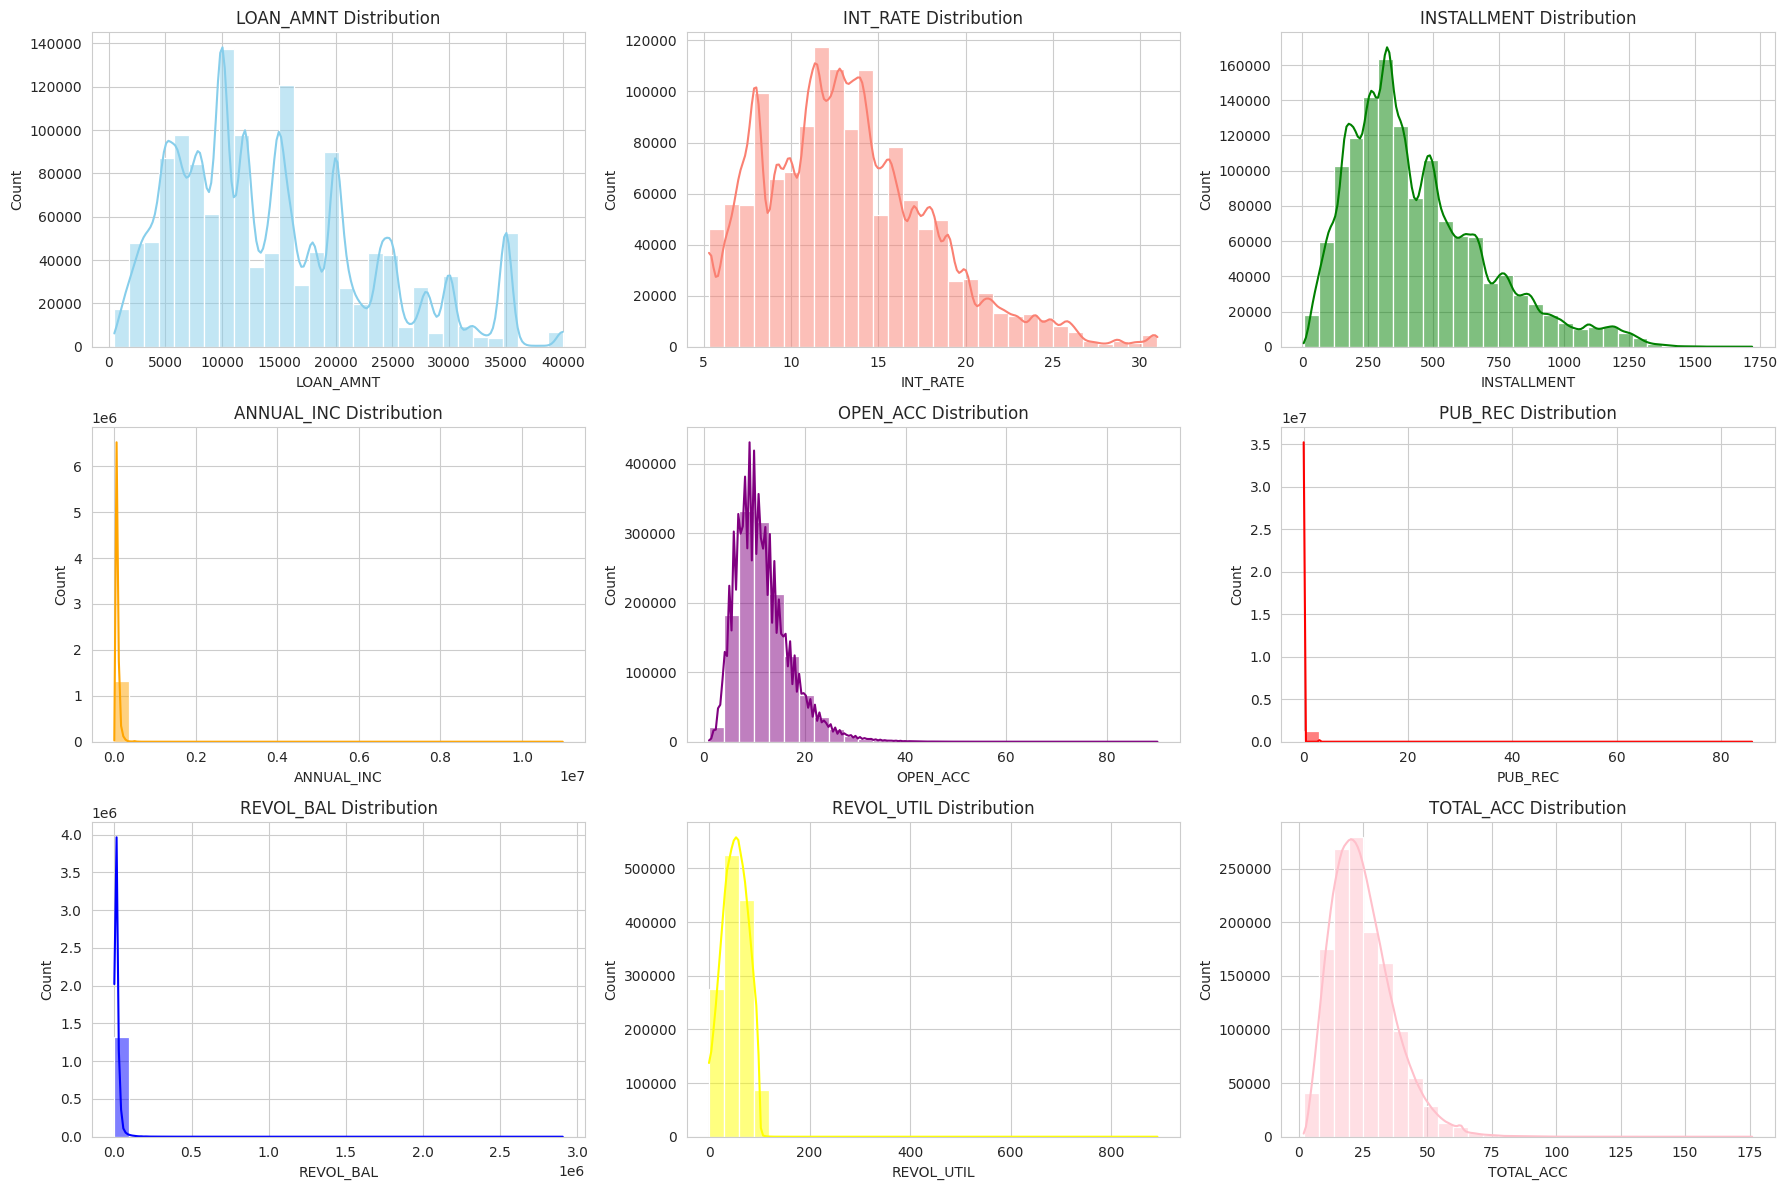

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль графиков
sns.set_style("whitegrid")

# Создаем фигуру для графиков
plt.figure(figsize=(18, 12))

# Построение гистограммы для признака LOAN_AMNT
plt.subplot(3, 3, 1)
sns.histplot(df_processed['LOAN_AMNT'], bins=30, kde=True, color='skyblue')
plt.title('LOAN_AMNT Distribution')

# Построение гистограммы для признака INT_RATE
plt.subplot(3, 3, 2)
sns.histplot(df_processed['INT_RATE'], bins=30, kde=True, color='salmon')
plt.title('INT_RATE Distribution')

# Построение гистограммы для признака INSTALLMENT
plt.subplot(3, 3, 3)
sns.histplot(df_processed['INSTALLMENT'], bins=30, kde=True, color='green')
plt.title('INSTALLMENT Distribution')

# Построение гистограммы для признака ANNUAL_INC
plt.subplot(3, 3, 4)
sns.histplot(df_processed['ANNUAL_INC'], bins=30, kde=True, color='orange')
plt.title('ANNUAL_INC Distribution')

# Построение гистограммы для признака OPEN_ACC
plt.subplot(3, 3, 5)
sns.histplot(df_processed['OPEN_ACC'], bins=30, kde=True, color='purple')
plt.title('OPEN_ACC Distribution')

# Построение гистограммы для признака PUB_REC
plt.subplot(3, 3, 6)
sns.histplot(df_processed['PUB_REC'], bins=30, kde=True, color='red')
plt.title('PUB_REC Distribution')

# Построение гистограммы для признака REVOL_BAL
plt.subplot(3, 3, 7)
sns.histplot(df_processed['REVOL_BAL'], bins=30, kde=True, color='blue')
plt.title('REVOL_BAL Distribution')

# Построение гистограммы для признака REVOL_UTIL
plt.subplot(3, 3, 8)
sns.histplot(df_processed['REVOL_UTIL'], bins=30, kde=True, color='yellow')
plt.title('REVOL_UTIL Distribution')

# Построение гистограммы для признака TOTAL_ACC
plt.subplot(3, 3, 9)
sns.histplot(df_processed['TOTAL_ACC'], bins=30, kde=True, color='pink')
plt.title('TOTAL_ACC Distribution')

# Отображение графиков
plt.tight_layout()
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [56]:
# Создадим копию датасета для обработки
df_processed_new = df_processed.copy()

In [57]:
df_processed_new['LOAN_STATUS'] = label_encoder.fit_transform(df_processed_new['LOAN_STATUS'])

In [62]:
# Для количественных признаков
numerical_features = ['LOAN_AMNT', 'INT_RATE', 'INSTALLMENT', 'ANNUAL_INC', 'OPEN_ACC', 'PUB_REC', 'REVOL_BAL', 'REVOL_UTIL', 'TOTAL_ACC']
# Для категориальных признаков
categorical_features = ['GRADE', 'SUB_GRADE', 'EMP_TITLE', 'EMP_LENGTH', 'HOME_OWNERSHIP', 'VERIFICATION_STATUS', 
                        'PURPOSE', 'TITLE', 'EARLIEST_CR_LINE', 'APPLICATION_TYPE']

correlation_numerical = df_processed_new[numerical_features].corrwith(df_processed_new['LOAN_STATUS'])

In [60]:
correlation_numerical

LOAN_AMNT     -0.065955
INT_RATE      -0.257961
INSTALLMENT   -0.052011
ANNUAL_INC     0.041109
OPEN_ACC      -0.028668
PUB_REC       -0.026026
REVOL_BAL      0.019723
REVOL_UTIL    -0.059617
TOTAL_ACC      0.010722
dtype: float64

1. **LOAN_AMNT**: Коэффициент корреляции -0.065955. Это отрицательная корреляция, что означает, что с увеличением суммы кредита снижается вероятность полного погашения кредита. Возможно, это связано с тем, что более высокие суммы кредитования могут означать более высокие риски для заёмщика, что повышает вероятность дефолта.

2. **INT_RATE**: Коэффициент корреляции -0.257961. Это также отрицательная корреляция. Более высокая процентная ставка (процент по кредиту) связана с меньшей вероятностью полного погашения кредита. Это логично, так как более высокая процентная ставка означает более высокие ежемесячные платежи, что может увеличить риск дефолта.

3. **INSTALLMENT**: Коэффициент корреляции -0.052011. Опять же, отрицательная корреляция. Более высокие ежемесячные выплаты (в размере аннуитета) также связаны с меньшей вероятностью полного погашения кредита. Это может быть связано с тем, что более высокие ежемесячные платежи могут создавать финансовые трудности для заёмщиков.

4. **ANNUAL_INC**: Коэффициент корреляции 0.041109. Это очень слабая положительная корреляция. Высокий ежегодный доход не оказывает значительного влияния на вероятность полного погашения кредита. Вероятно, другие факторы, такие как кредитная история или текущая задолженность, более важны для прогнозирования возврата кредита.

5. **OPEN_ACC**: Коэффициент корреляции -0.028668. Это отрицательная корреляция, но очень слабая. Количество открытых кредитных линий или ссуд не оказывает значительного влияния на вероятность полного погашения кредита.

6. **PUB_REC**: Коэффициент корреляции -0.026026. Опять же, отрицательная корреляция, но очень слабая. Количество публичных записей о банкротствах не оказывает значительного влияния на вероятность полного погашения кредита.

7. **REVOL_BAL**: Коэффициент корреляции 0.019723. Это очень слабая положительная корреляция. Высокий остаток по кредитным картам не оказывает значительного влияния на вероятность полного погашения кредита.

8. **REVOL_UTIL**: Коэффициент корреляции -0.059617. Это отрицательная корреляция, но также слабая. Высокий процент использования кредитных линий (отношение текущего баланса кредитных карт к их кредитному лимиту) не оказывает значительного влияния на вероятность полного погашения кредита.

9. **TOTAL_ACC**: Коэффициент корреляции 0.010722. Это очень слабая положительная корреляция. Общее количество кредитных счетов, открытых заёмщиком, также не оказывает значительного влияния на вероятность полного погашения кредита.

Итак, по исследованным данным можно сделать вывод, что наиболее существенное влияние на вероятность полного погашения кредита оказывают процентная ставка (INT_RATE) и сумма ежемесячного платежа (INSTALLMENT), что вполне логично, учитывая их прямое отношение к финансовой нагрузке на заёмщика. Другие признаки, такие как сумма кредита (LOAN_AMNT), ежегодный доход (ANNUAL_INC) и другие, имеют слабое влияние на результат.

In [63]:
# Преобразуем категориальные признаки в числовые
label_encoder = LabelEncoder()
for feature in categorical_features:
    df_processed_new[feature] = label_encoder.fit_transform(df_processed_new[feature].astype(str))

# Для категориальных признаков
correlation_categorical = pd.Series(dtype=float)
for feature in categorical_features:
    confusion_matrix = pd.crosstab(df_processed_new[feature], df_processed_new['LOAN_STATUS'])
    chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
    correlation_categorical[feature] = np.sqrt(chi2 / df_processed_new.shape[0])

# Выведем результаты
print("Корреляция категориальных признаков с LOAN_STATUS (коэффициент корреляции Крамера):")
print(correlation_categorical)

Корреляция категориальных признаков с LOAN_STATUS (коэффициент корреляции Крамера):
GRADE                  0.261189
SUB_GRADE              0.267141
EMP_TITLE              0.540820
EMP_LENGTH             0.007544
HOME_OWNERSHIP         0.070050
VERIFICATION_STATUS    0.091492
PURPOSE                0.055614
TITLE                  0.207151
EARLIEST_CR_LINE       0.059765
APPLICATION_TYPE       0.017048
dtype: float64


Коэффициент корреляции Крамера позволяет оценить силу связи между двумя категориальными переменными. Значения близкие к 0 указывают на отсутствие связи, а значения близкие к 1 - на сильную связь.

Исходя из представленных данных:

1. **GRADE** и **SUB_GRADE**: Коэффициент корреляции Крамера между оценкой и подоценкой составляет 0.261189 и 0.267141 соответственно, что указывает на наличие умеренной положительной связи между ними.

2. **EMP_TITLE**: Коэффициент корреляции Крамера с должностью заемщика составляет 0.540820, что может указывать на значительное влияние должности на вероятность возврата кредита.

3. **EMP_LENGTH**: Этот признак имеет очень слабую положительную связь с целевой переменной (коэффициент корреляции Крамера = 0.007544), что означает, что длина работы не сильно влияет на вероятность погашения кредита.

4. **HOME_OWNERSHIP** и **VERIFICATION_STATUS**: Оба признака имеют небольшое положительное влияние на целевую переменную с коэффициентами корреляции Крамера 0.070050 и 0.091492 соответственно.

5. **PURPOSE** и **TITLE**: Коэффициенты корреляции Крамера для этих признаков также невелики и составляют 0.055614 и 0.207151 соответственно, что указывает на умеренную связь между ними и вероятностью возврата кредита.

6. **EARLIEST_CR_LINE** и **APPLICATION_TYPE**: Оба признака также имеют слабую положительную связь с целевой переменной, с коэффициентами корреляции Крамера 0.059765 и 0.017048 соответственно.

Таким образом, оценка заемщика (**GRADE** и **SUB_GRADE**), должность (**EMP_TITLE**) и цель кредита (**PURPOSE** и **TITLE**) оказывают наибольшее влияние на вероятность погашения кредита, в то время как другие признаки имеют менее значимое воздействие.

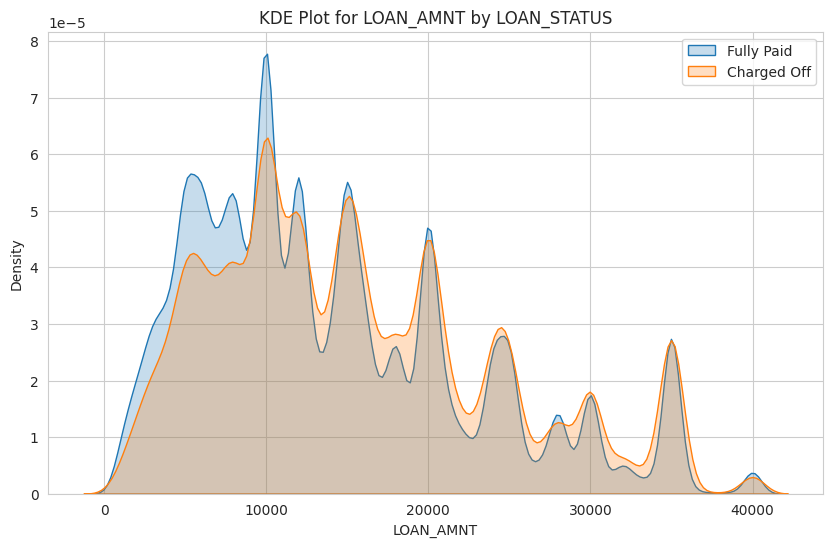

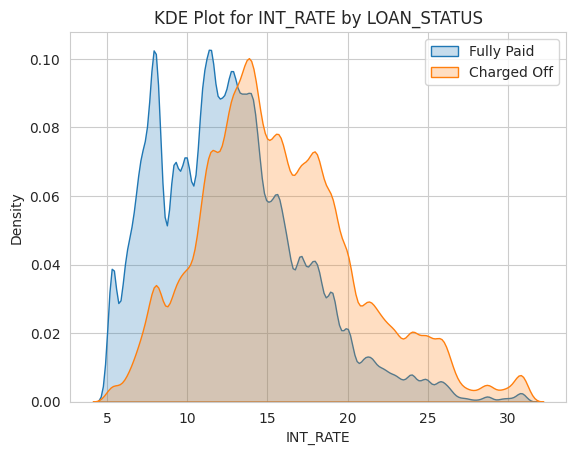

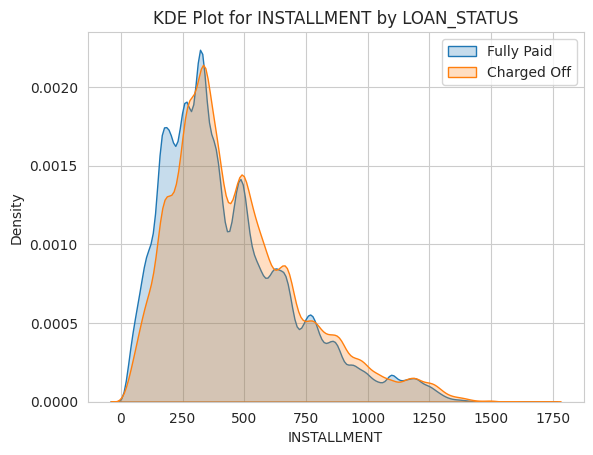

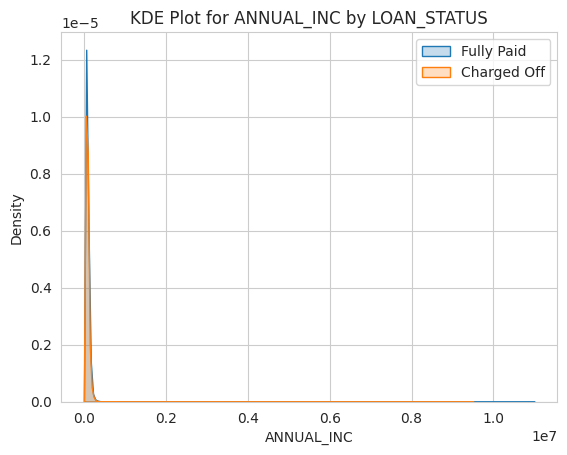

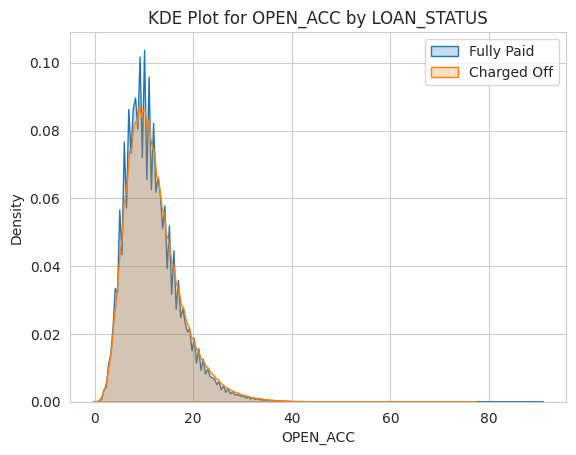

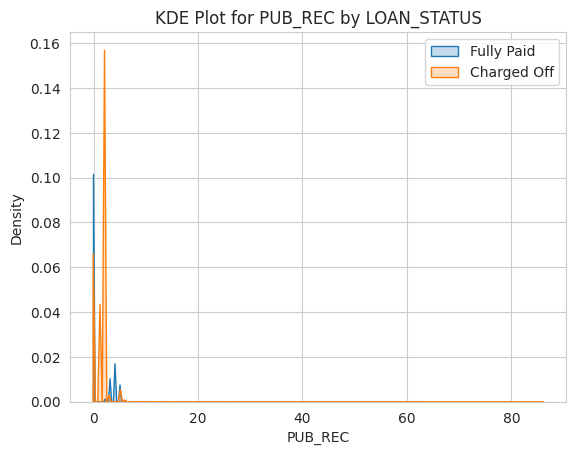

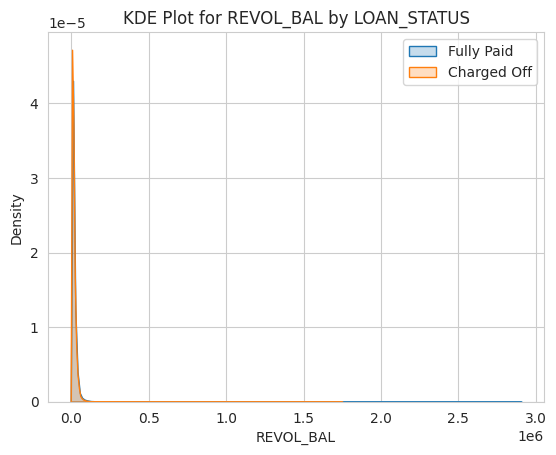

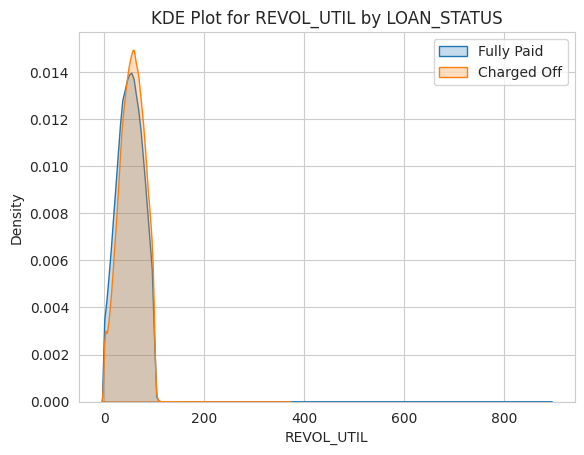

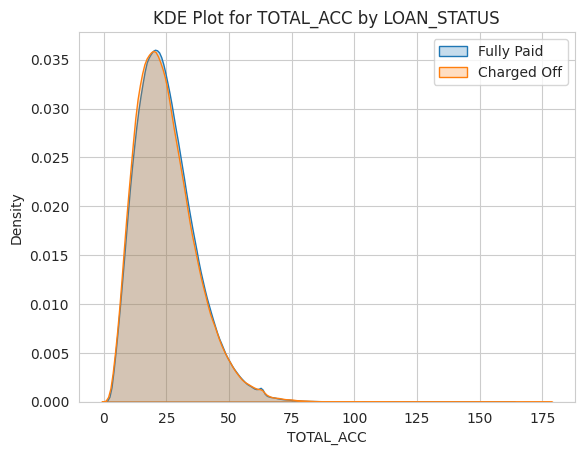

In [65]:
# Устанавливаем размеры графика
plt.figure(figsize=(10, 6))

# Заменяем 'LOAN_STATUS' на вашу целевую переменную
target_variable = 'LOAN_STATUS'

# Список признаков для построения KDE графиков
features = ['LOAN_AMNT', 'INT_RATE', 'INSTALLMENT', 'ANNUAL_INC', 'OPEN_ACC', 'PUB_REC', 'REVOL_BAL', 'REVOL_UTIL', 'TOTAL_ACC']

# Цикл для построения KDE графиков для каждого признака
for feature in features:
    sns.kdeplot(data=df_processed[df_processed[target_variable] == 'Fully Paid'][feature], label='Fully Paid', shade=True)
    sns.kdeplot(data=df_processed[df_processed[target_variable] == 'Charged Off'][feature], label='Charged Off', shade=True)
    plt.title(f'KDE Plot for {feature} by {target_variable}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

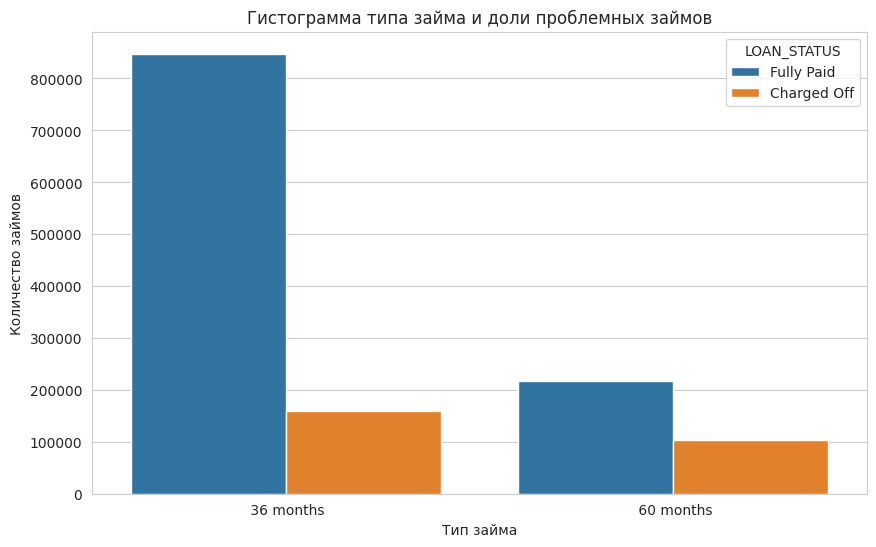

In [66]:
# Устанавливаем размеры графика
plt.figure(figsize=(10, 6))

# Строим гистограмму типа займа и доли проблемных займов
sns.countplot(data=df_processed, x='TERM', hue='LOAN_STATUS')
plt.title('Гистограмма типа займа и доли проблемных займов')
plt.xlabel('Тип займа')
plt.ylabel('Количество займов')
plt.legend(title='LOAN_STATUS', loc='upper right')
plt.show()


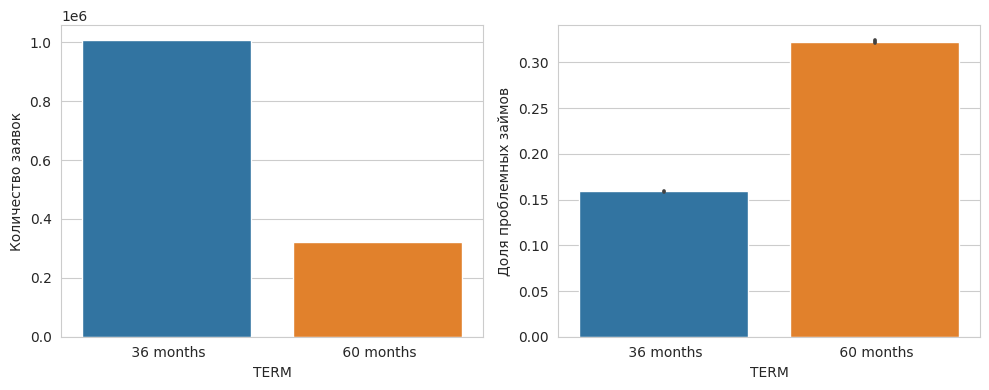

In [74]:
# Преобразование категориальных значений в числовые
df_processed['LOAN_STATUS_NUMERIC'] = df_processed['LOAN_STATUS'].map({'Fully Paid': 0, 'Charged Off': 1})

# Устанавливаем размеры графиков
plt.figure(figsize=(10, 4))

# График количества заявок по каждому типу займа
plt.subplot(1, 2, 1)
sns.countplot(data=df_processed, x='TERM')
plt.xlabel('TERM')
plt.ylabel('Количество заявок')

# График доли проблемных займов для каждого типа займа
plt.subplot(1, 2, 2)
sns.barplot(data=df_processed, x='TERM', y='LOAN_STATUS_NUMERIC', estimator='mean')
plt.xlabel('TERM')
plt.ylabel('Доля проблемных займов')

plt.tight_layout()
plt.show()

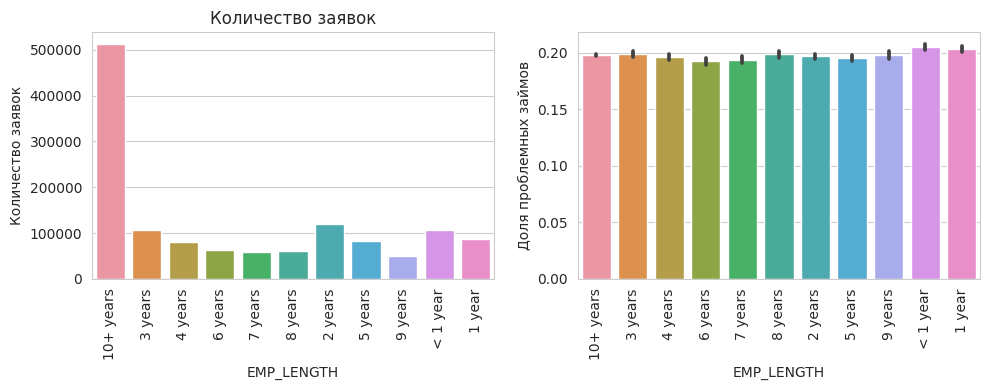

In [76]:
# Устанавливаем размеры графиков
plt.figure(figsize=(10, 4))

# График количества заявок по каждому типу займа
plt.subplot(1, 2, 1)
sns.countplot(data=df_processed, x='EMP_LENGTH')
plt.title('Количество заявок')
plt.xlabel('EMP_LENGTH')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)

# График доли проблемных займов для каждого типа займа
plt.subplot(1, 2, 2)
sns.barplot(data=df_processed, x='EMP_LENGTH', y='LOAN_STATUS_NUMERIC', estimator='mean')
plt.xlabel('EMP_LENGTH')
plt.ylabel('Доля проблемных займов')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

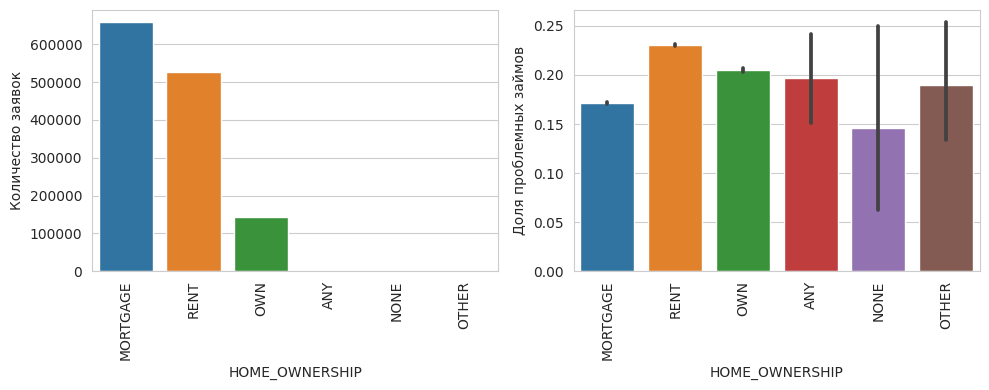

In [77]:
# Устанавливаем размеры графиков
plt.figure(figsize=(10, 4))

# График количества заявок по каждому типу займа
plt.subplot(1, 2, 1)
sns.countplot(data=df_processed, x='HOME_OWNERSHIP')
plt.xlabel('HOME_OWNERSHIP')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)

# График доли проблемных займов для каждого типа займа
plt.subplot(1, 2, 2)
sns.barplot(data=df_processed, x='HOME_OWNERSHIP', y='LOAN_STATUS_NUMERIC', estimator='mean')
plt.xlabel('HOME_OWNERSHIP')
plt.ylabel('Доля проблемных займов')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

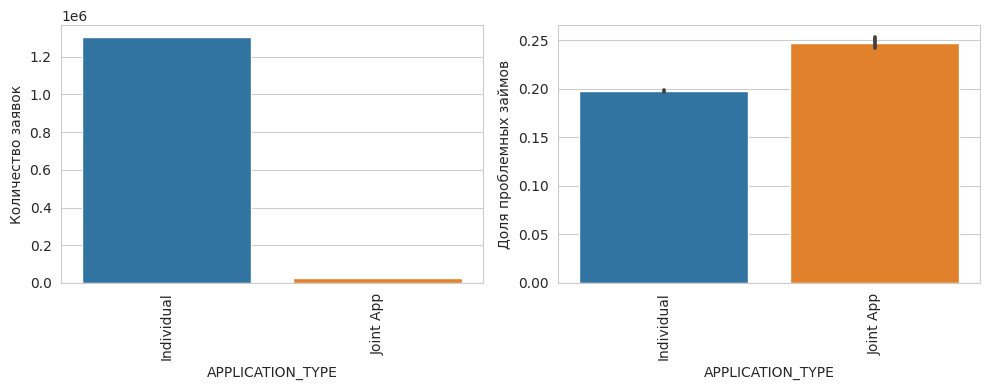

In [78]:
# Устанавливаем размеры графиков
plt.figure(figsize=(10, 4))

# График количества заявок по каждому типу займа
plt.subplot(1, 2, 1)
sns.countplot(data=df_processed, x='APPLICATION_TYPE')
plt.xlabel('APPLICATION_TYPE')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)

# График доли проблемных займов для каждого типа займа
plt.subplot(1, 2, 2)
sns.barplot(data=df_processed, x='APPLICATION_TYPE', y='LOAN_STATUS_NUMERIC', estimator='mean')
plt.xlabel('APPLICATION_TYPE')
plt.ylabel('Доля проблемных займов')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

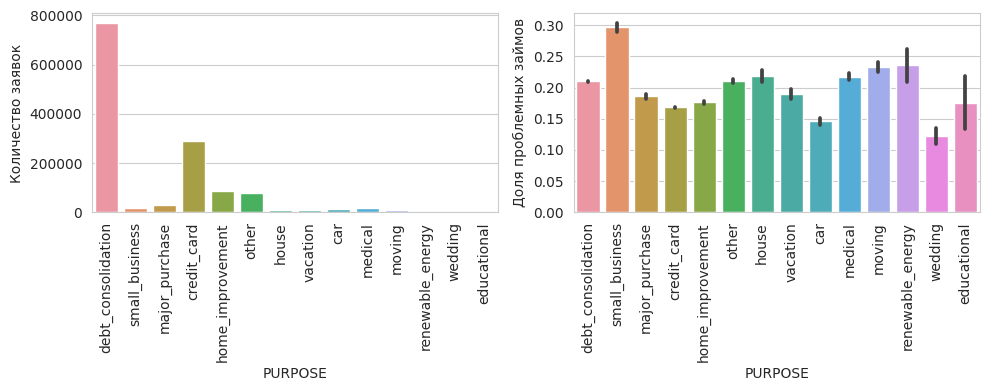

In [79]:
# Устанавливаем размеры графиков
plt.figure(figsize=(10, 4))

# График количества заявок по каждому типу займа
plt.subplot(1, 2, 1)
sns.countplot(data=df_processed, x='PURPOSE')
plt.xlabel('PURPOSE')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)

# График доли проблемных займов для каждого типа займа
plt.subplot(1, 2, 2)
sns.barplot(data=df_processed, x='PURPOSE', y='LOAN_STATUS_NUMERIC', estimator='mean')
plt.xlabel('PURPOSE')
plt.ylabel('Доля проблемных займов')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

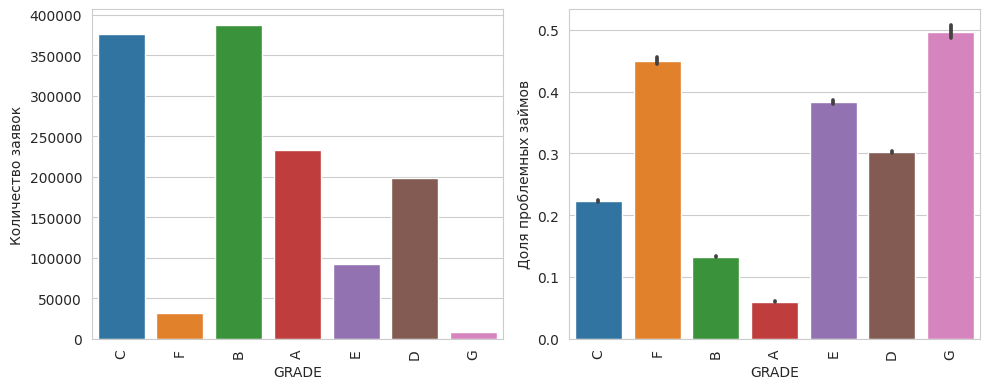

In [80]:
# Устанавливаем размеры графиков
plt.figure(figsize=(10, 4))

# График количества заявок по каждому типу займа
plt.subplot(1, 2, 1)
sns.countplot(data=df_processed, x='GRADE')
plt.xlabel('GRADE')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)

# График доли проблемных займов для каждого типа займа
plt.subplot(1, 2, 2)
sns.barplot(data=df_processed, x='GRADE', y='LOAN_STATUS_NUMERIC', estimator='mean')
plt.xlabel('GRADE')
plt.ylabel('Доля проблемных займов')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()